# Pyroot Basics modified by Guoaq

In this notebook we will review the basics of pyroot. Pyroot provides a python interface to root, allowing for simpler code.
As usual there is a tradeoff between simplicity (or more general code) and performance. However, in an interactive usage the biggest bottleneck is generally the speed at which code is written, debugged and tested.

We will start with a simple example: draw a canvas with a function in it. This is the time to introduce two important extensions for specific to the ipython notebook:

1. **rootnotes**: a wrapper for TCanvas. Normally, when drawing a TCanvas a new window would pop up. By creating the canvas via rootnotes the figure will instead be embedded in the notebook. 

2. **%%rootprint**: an ipython magic command allowing to capture output that root would normally direct to the terminal and display it in the cell. Normally, any python output will be written under the corresponding cell, however, some root functions produce output that go directly in the terminal (such as fit results). This command must be the first one in the cell and will capture all outputs. However, if this command is used for a cell, the canvas cannot be shown in the same cell.  

In [3]:
import ROOT
from ROOT import gROOT, TCanvas, TF1, TFile, TTree, gRandom, TH1F
import rootnotes
import rootprint
import utils


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



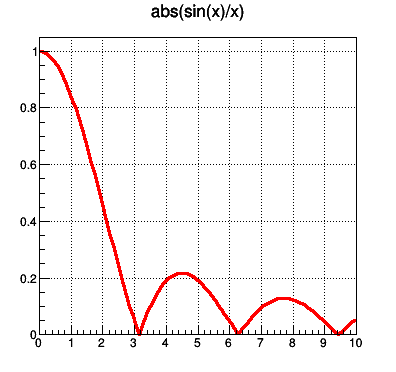

Info in <TCanvas::Print>: png file /var/folders/qv/wttd0q9146d_412j470pwggc0000gn/T/tmp0nI3o5.png has been created


In [4]:
gROOT.Reset()

# This is what you would normally do in pyroot
# c1 = TCanvas( 'c1', 'Example with Formula', 200, 10, 700, 500 )
# This is to draw the canvas embedded in the notebook
c1 = rootnotes.canvas("Example with Formula", (400, 400))

# Create a one dimensional function and draw it
fun1 = TF1( 'fun1', 'abs(sin(x)/x)', 0, 10 )
c1.SetGridx()
#c1.SetGridy()
fun1.Draw()

c1

#### Produce a tree

The output file will include a tree filled sampling values from a gaussian distribution and a histogram filled with a uniform distribution

In [5]:
import numpy

print "Writing a tree and filling a histogram"

f = TFile("tree.root", "recreate")
t = TTree("name_of_tree", "tree title")

# create 1 dimensional float arrays (python's float datatype corresponds to c++ doubles)
# as fill variables
n = numpy.zeros(1, dtype=float)

# create the branches and assign the fill-variables to them
t.Branch('gaus', n, 'gaus/D')

# create the histograms
hUniform = TH1F("uniform", "uniform", 20, 0, 1)

# create some random numbers, fill them into the fill varibles and call Fill()
for i in xrange(10000):
	n[0] = gRandom.Gaus()
	t.Fill()
	hUniform.Fill( gRandom.Uniform() )


# write the tree into the output file and close the file
f.Write()
f.Close()

Writing a tree and filling a histogram


#### Capturing output

Use the rootprint. This is included in utils.py.
Try to uncomment the magic command and rerun the code.

In [6]:
%%rootprint

inputFile = TFile("tree.root")
inputFile.ls()
tree = inputFile.Get("name_of_tree")
tree.Print()

TFile**		tree.root	
 TFile*		tree.root	
  KEY: TTree	name_of_tree;1	tree title
  KEY: TH1F	uniform;1	uniform
******************************************************************************
*Tree    :name_of_tree: tree title                                             *
*Entries :    10000 : Total =           81069 bytes  File  Size =      72438 *
*        :          : Tree compression factor =   1.11                       *
******************************************************************************
*Br    0 :gaus      : gaus/D                                                 *
*Entries :    10000 : Total  Size=      80715 bytes  File Size  =      72041 *
*Baskets :        3 : Basket Size=      32000 bytes  Compression=   1.11     *
*............................................................................*



Superimposing two distributions on the same canvas

In [7]:
%%rootprint

hUniform = inputFile.FindObjectAny("uniform")

c2 = rootnotes.canvas("TreeCanvas", (800, 400))
c2.Divide(2)
c2.cd(1)
tree.Draw("gaus")
c2.cd(2)
hUniform.GetYaxis().SetRangeUser(0,1000)
hUniform.Draw()

In [13]:
c2

#### How to draw a TGraph

A TGraph expects C arrays so it will not accept a python list [1,2,...]. The list can be converted into an array using python "array" module

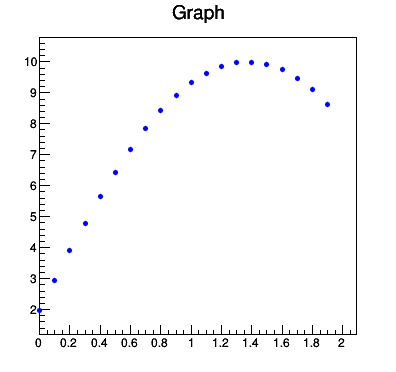

Info in <TCanvas::Print>: png file /var/folders/qv/wttd0q9146d_412j470pwggc0000gn/T/tmpC6junK.png has been created


In [8]:
from array import array
import math

nBins = 20
x = []
y = [0]*nBins
for i in range(nBins):
    x.append(i*0.1)
    y[i] = 10*math.sin(x[i]+0.2)

graphCanvas = rootnotes.canvas("graphCanvas", (400, 400))
# The lists must be converted to C arrays
g = ROOT.TGraph(nBins, array('d', x), array('d', y))
# "A" option is required because the TGraph will not create the TAxis by default
ROOT.gStyle.SetMarkerStyle(8)
ROOT.gStyle.SetMarkerSize(2)
g.Draw("AP")
graphCanvas

### Exercise

**Question 1**: do a fit of the gaussian and the linear distributions. Get the fit parameters and plot the fit function.